# **Identify Segments vulnerable to Fraud using Clustering**

#### **Problem Statement**
<font size=4> _Every year huge amount of medical claim frauds are reported, hindrances to those in dire need of the system to work efficiently. This damage (money loss) in reverse haunts the end consumer and puts superfluous strain on their medical leeway._</font>
    
<font size=4> _This project tries to address this issue by creating clusters from features of data and then analyze the risk involved of fraud by category. In the next section, the KMeans clustering method would be used to segment the below-mentioned dataset using its features which might correlate with fraud risks._ 

Data Source: https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/PartD2013
</font>

<font size=2.6>_Note: The original dataset has been transformed outside of this python notebook using SAS University Edition. Please refer to files names A and B for more information._ </font>


#### **Introduction to K-Means Clustering Algorithm**
##### As per *Introduction to Machine Learning with Python* by Andreas C. Müller & Sarah Guido, 
<font size=4> K-means clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes.</font>

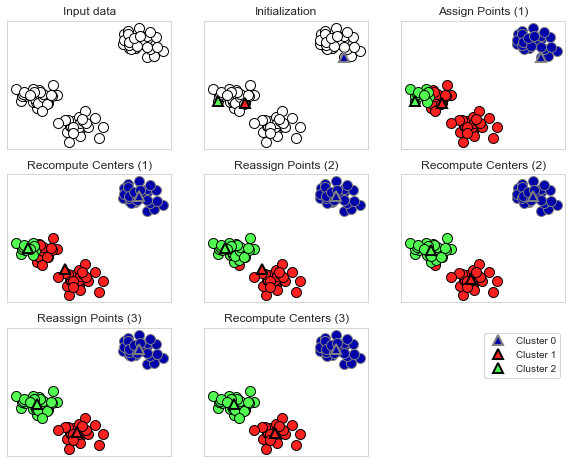

In [4]:
import mglearn as mg

mg.plots.plot_kmeans_algorithm()

<font size=4> Here, the Cluster centers are shown as triangles, while data points are shown as circles. Colors indicate cluster membership. Data is split into three clusters. Process to find cluster centers is repeated until centers are no longer changing. </font>

#### **Import Standard Libraries and Packages**

In [2]:
# importing all the libraries/packages for code

import numpy as np # used for numerical and array calculations
import pandas as pd # used for data represented as a tabular object and all the function that come with it

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid') # Set Style for plots

# metrics and functions to clean/transform data or evaluate models
from sklearn.model_selection import train_test_split # for splitting data to get training and testing sets
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

# metrics used for evaluation of the model
from sklearn.metrics import accuracy_score, classification_report, silhouette_samples, silhouette_score

# Data scaling and normalization of data
# Encoders - transform categorical data to numerical notations so that models can use them as input
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Importing algorithms to build models
from sklearn.cluster import KMeans,DBSCAN

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#### **Import the dataset into a dataframe**

In [5]:
npi = pd.read_csv("npi_final.csv")
npi.head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,drug_name,generic_name,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003000126,CUMBERLAND,MD,Internal Medicine,LEVOFLOXACIN,LEVOFLOXACIN,26,26,26.0,165,227.10,15,15,15.0,106,159.72
1,1003000142,TOLEDO,OH,Anesthesiology,GABAPENTIN,GABAPENTIN,34,100,108.9,3194,1999.29,14,44,51.9,1547,1032.74
2,1003000142,TOLEDO,OH,Anesthesiology,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,25,96,96.0,2587,1553.76,12,42,42.0,1058,554.60
3,1003000522,DELTONA,FL,Family Practice,ALLOPURINOL,ALLOPURINOL,16,74,155.0,4650,514.89,16,74,155.0,4650,514.89
4,1003000522,DELTONA,FL,Family Practice,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,15,20,20.0,139,108.69,15,20,20.0,139,108.69


In [7]:
#Specify column names which we want to encode
categorical_features = ['nppes_provider_city', 'nppes_provider_state', 'specialty_description', 'drug_name','generic_name']

#labelencode the categorical features
for i, cat in enumerate(categorical_features):
    npi[cat] = LabelEncoder().fit_transform(npi[cat])

In [6]:
#show new dataframe
npi.head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,drug_name,generic_name,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003000126,1968,24,57,706,528,26,26,26.0,165,227.10,15,15,15.0,106,159.72
1,1003000142,8871,40,7,535,410,34,100,108.9,3194,1999.29,14,44,51.9,1547,1032.74
2,1003000142,8871,40,7,593,447,25,96,96.0,2587,1553.76,12,42,42.0,1058,554.60
3,1003000522,2118,12,40,42,30,16,74,155.0,4650,514.89,16,74,155.0,4650,514.89
4,1003000522,2118,12,40,264,187,15,20,20.0,139,108.69,15,20,20.0,139,108.69


#### **Data Normalization and Visualization**

In [10]:
numeric_df = npi[['total_claim_count', 'total_day_supply', 'total_drug_cost', 'bene_count']] # Specify columns for numerical columns
numeric_df = np.log(numeric_df) # Transform the numeric columnns using log transformation

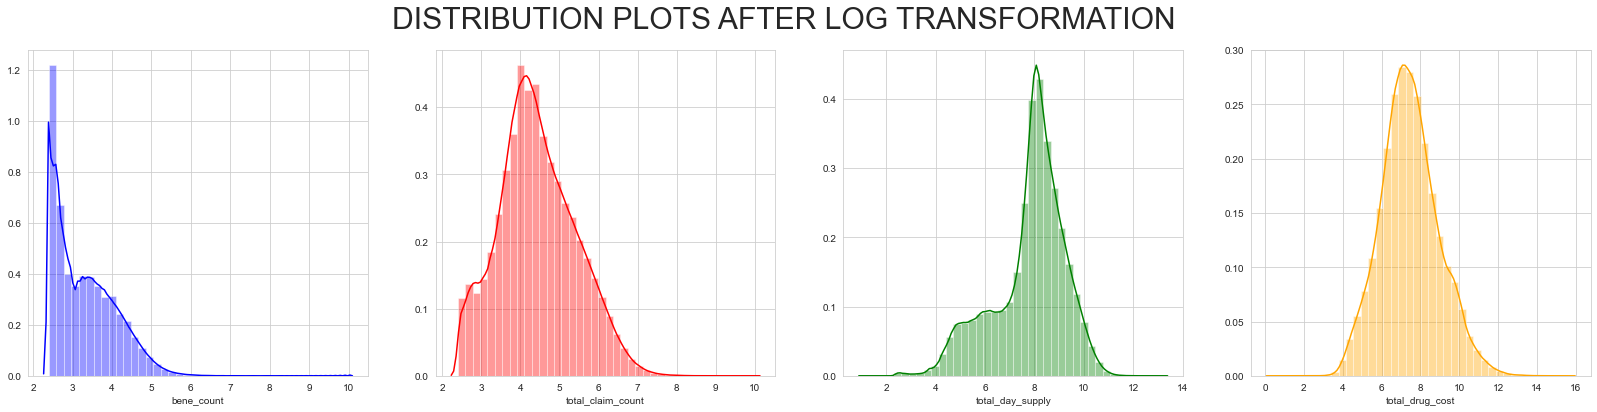

In [11]:
fig, ax = plt.subplots(1,4,figsize=(28,6)) # Set the size of figure and axes
plt.suptitle('DISTRIBUTION PLOTS AFTER LOG TRANSFORMATION',size=30) # Set the centered title for plots
sns.distplot(numeric_df['bene_count'], bins=40, ax=ax[0], color = 'Blue') # Create distribution plot for 'bene_count'
sns.distplot(numeric_df['total_claim_count'], bins=40, ax=ax[1], color='Red') # Create distribution plot for 'total_claim_count'
sns.distplot(numeric_df['total_day_supply'], bins=40, ax=ax[2], color='Green') # Create distribution plot for 'total_day_supply'
sns.distplot(numeric_df['total_drug_cost'], bins=40, ax=ax[3], color='Orange') # Create distribution plot for 'total_drug_cost'
plt.show() # Show the plots

#### **Scale the data**

In [12]:
## Applying Standard Scalar
scaler = StandardScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df) # Fit and transform the dataframe

In [11]:
#show new values
print(numeric_df_scaled.shape) # display the shape of array
numeric_df_scaled # display the array values

(2010300, 4)


array([[-1.1920665 , -1.87035853, -1.36110826, -0.05839609],
       [ 0.17724971,  0.18464453,  0.09322884,  0.29399372],
       [ 0.13575367,  0.03846454, -0.07533794, -0.10991616],
       ...,
       [-0.0369507 ,  0.42776402,  1.73768197, -0.33894563],
       [-0.88990683, -1.70641459,  0.85926232,  0.33207156],
       [-1.08106414, -0.53108503, -0.70924448, -0.96890968]])

#### **Model Building**

##### **K-MEANS - APPLYING ELBOW METHOD TO FIND THE BEST NUMBER OF CLUSTERS**

- The basic idea behind partitioning methods or segmentation (e.g. k-means clustering) is to define clusters such that the total intra-cluster variation (or total within-cluster sum of square (WSS)) is minimized. 
- The total WSS measures the compactness of the clustering and we want it to be as small as possible.
- The Elbow method looks at the total WSS as a function of the number of clusters. 
- One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

In [12]:
cost = [] # Declare empty array

# Cost here signifies the WSS

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=882) # Invoke KMeans Model
    kmeans.fit(numeric_df_scaled) # Fit KMeans model
    cost.append(kmeans.inertia_)


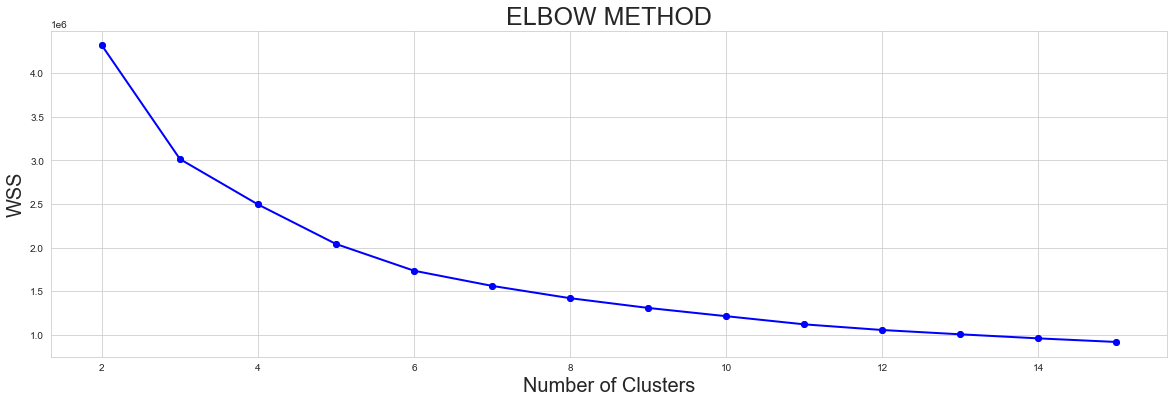

In [13]:
plt.figure(figsize=(20,6)) # Set the size of the figure
plt.scatter(np.arange(2,16),cost) # Create scatter plot for number of clusters
plt.plot(np.arange(2,16),cost, marker='o', lw=2, color='blue') # Plot number of Clusters
plt.title("ELBOW METHOD", size=25) # Set the title of plot
plt.xlabel("Number of Clusters", size=20) # X axis Label
plt.ylabel("WSS", size=20) # Y axis label
plt.rcParams["figure.figsize"] = (8,8)
plt.show() # Show the plot

<font size=4> To determine the optimal number of clusters, we have to select the value of k at the "elbow", i.e., the point after which the distortion/inertia start decreasing in a linear fashion. Thus, for the given data, we conclude that the optimal number of clusters for the data can be (3,4,5).</font>

#### **Let's build our model for Number of Clusters = 4, i.e., Choosing k = 4**

In [14]:
km = KMeans(n_clusters=4, random_state=465) # Invoke Kmeans algo and create a model
clusters = km.fit_predict(numeric_df_scaled) # Fit the model for prediction

In [15]:
df_clustered = npi[['total_claim_count', 'total_day_supply', 'total_drug_cost', 'bene_count']] # Select features which will be used to determine clusters
df_clustered['cluster'] = clusters # Add cluster information to the original dataset

In [16]:
df_clustered.groupby('cluster').mean() # means of each cluster

,total_claim_count,total_day_supply,total_drug_cost,bene_count
cluster,,,,
0,146.742720,5389.751079,5992.452664,42.578903
1,59.306318,2783.670149,3755.595366,15.415415
2,29.271619,343.516440,520.771796,22.666176
3,456.731239,16867.118298,19824.010557,103.061306


#### Now, we have 4 clusters. Let's interpret our clusters using above information:  
- **Cluster 0** - Mediocre Drug Cost/Supply but mediocre claims/beneficiaries - Mediocre Risk (of Fraud)
- **Cluster 1** - Mediocre Drug Cost/Supply but low claims/beneficiaries - Low Risk (of Fraud)
- **Cluster 2** - Low of everything - Lowest Risk (of Fraud)
- **Cluster 3** - High of Everything - Maximum Risk (of Fraud)

##### The Clusters are overlapping each other, hence not a good description of the pattern. 

#### **Plotting of Data wrt Clusters**

In [28]:
# Reshape data for plotting
cluster_plot = pd.melt(df_clustered.reset_index(),
                       id_vars=['cluster'],
                       value_vars=['total_claim_count', 'total_day_supply', 'total_drug_cost', 'bene_count'],
                       var_name='Metrics',
                       value_name='Values')

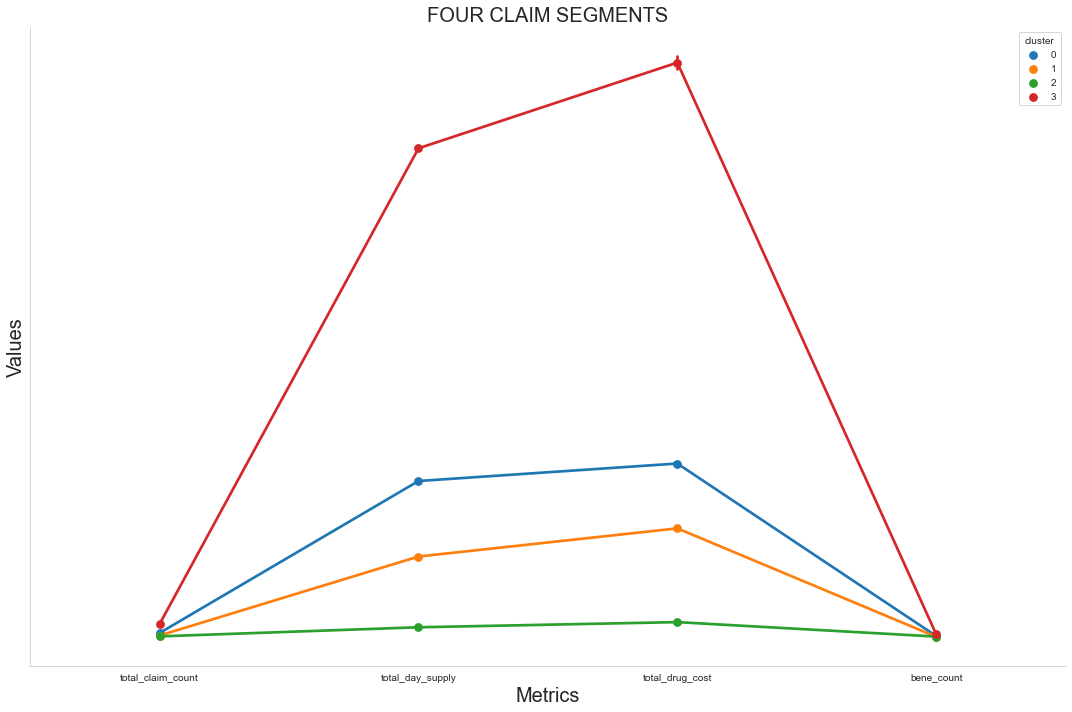

In [29]:
# Create Cluster Plot
plt.figure(figsize=(15,10))
sns.pointplot(x='Metrics', y='Values', data=cluster_plot, hue='cluster')
plt.xlabel("Metrics", size=20)
plt.ylabel('Values', size=20)
plt.yticks([])
plt.title('FOUR CLAIM SEGMENTS', size=20)
sns.despine()
plt.tight_layout()
plt.show()

#### The above plot depicts our 4 claim segments. 

#### **Let's build our model for Number of Clusters = 3, i.e., Choosing k = 3**

In [30]:
km = KMeans(n_clusters=3, random_state=465) # Invoke Kmeans algo and create a model
clusters = km.fit_predict(numeric_df_scaled) # Fit the model for prediction
df_clustered1 = npi[['total_claim_count', 'total_day_supply', 'total_drug_cost', 'bene_count']] # Select features which will be used to determine clusters
df_clustered1['cluster'] = clusters # Add cluster information to the original dataset
df_clustered1.groupby('cluster').mean() # means of each cluster

,total_claim_count,total_day_supply,total_drug_cost,bene_count
cluster,,,,
0,30.842663,423.918921,563.645328,23.044709
1,327.093330,12001.744588,13748.733555,78.705817
2,75.472668,3288.429351,4262.966411,20.336345


#### Now, we have 3 clusters. Let's interpret our clusters using above information:
- **Cluster 0** Low claims, Beneficiaries and mediocre Drug Cost/Supply - Mediocre Risk (of Fraud)
- **Cluster 1** High of Everything - High Risk (of Fraud)
- **Cluster 2** Mediocre Claims, Supply, DrugCost and low Beneficiaries - Mediocre Risk (of Fraud) 

##### Above clusters seem inconclusive and incomplete.

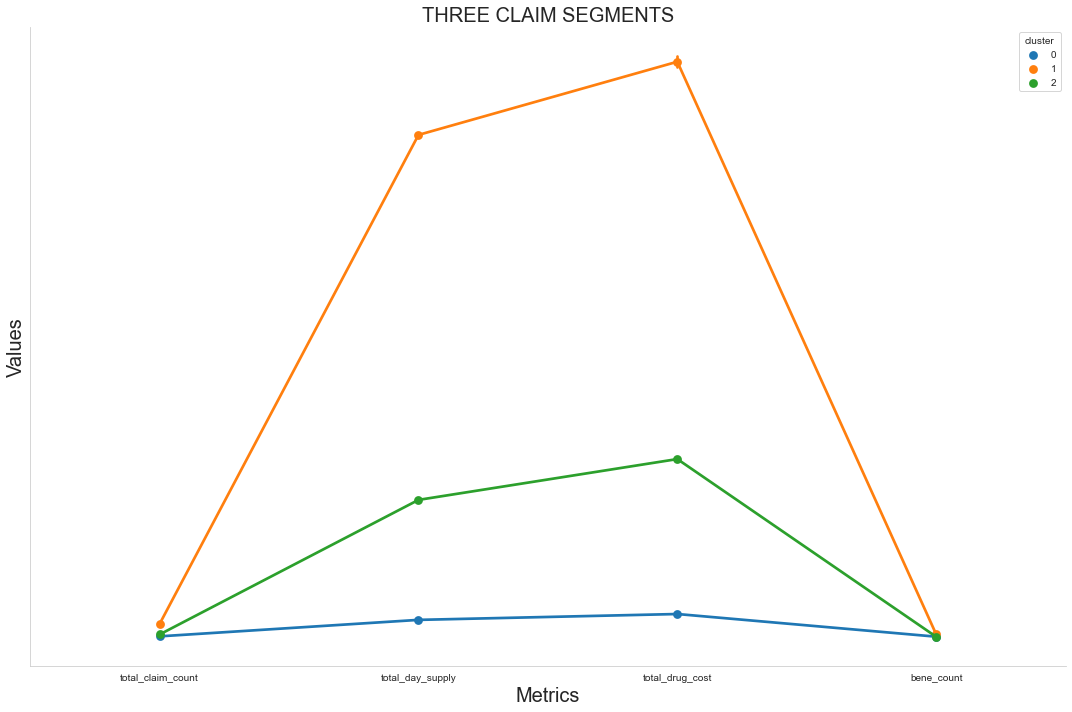

In [31]:
# Reshape data for plotting
cluster_plot = pd.melt(df_clustered1.reset_index(),
                       id_vars=['cluster'],
                       value_vars=['total_claim_count', 'total_day_supply', 'total_drug_cost', 'bene_count'],
                       var_name='Metrics',
                       value_name='Values')

# Create Cluster Plot
plt.figure(figsize=(15,10))
sns.pointplot(x='Metrics', y='Values', data=cluster_plot, hue='cluster')
plt.xlabel("Metrics", size=20)
plt.ylabel('Values', size=20)
plt.yticks([])
plt.title('THREE CLAIM SEGMENTS', size=20)
sns.despine()
plt.tight_layout()
plt.show()

#### The above plot depicts our 3 claim segments.

#### **Let's build our model for Number of Clusters = 5, i.e., Choosing k = 5**

In [32]:
km = KMeans(n_clusters=5, random_state=465) # Invoke Kmeans algo and create a model
clusters = km.fit_predict(numeric_df_scaled) # Fit the model for prediction
df_clustered2 = npi[['total_claim_count', 'total_day_supply', 'total_drug_cost', 'bene_count']] # Select features which will be used to determine clusters
df_clustered2['cluster'] = clusters # Add cluster information to the original dataset
df_clustered2.groupby('cluster').mean() # means of each cluster

,total_claim_count,total_day_supply,total_drug_cost,bene_count
cluster,,,,
0,149.694359,5454.099922,2428.615002,45.438940
1,57.876419,2765.803138,1157.449914,15.588615
2,28.118712,290.717027,538.551469,22.411885
3,460.153186,17020.126967,17972.023898,103.557788
4,82.792609,3296.484598,20627.503381,18.936782


#### Now, we have 5 clusters. Let's interpret our clusters using above information:  
- **Cluster 0** Mediocre Risk Cluster
- **Cluster 1** Low Risk Cluster
- **Cluster 2** Normal Diseases Cluster (relatively lowest risk of fraud)
- **Cluster 3** Maximum Risk Cluster (highest fraud rating for this cluster, higher claims and drug costs)
- **Cluster 4** Unique Diseases Cluster (to be monitored, irrespective of fraud rating)

##### If new data points can be categorized as any of th above cluster, then we can predict something similar to a score. It wouldn't predict whether its fraud or not but a likelihood of whether its worth analyzing to check for a fraud.

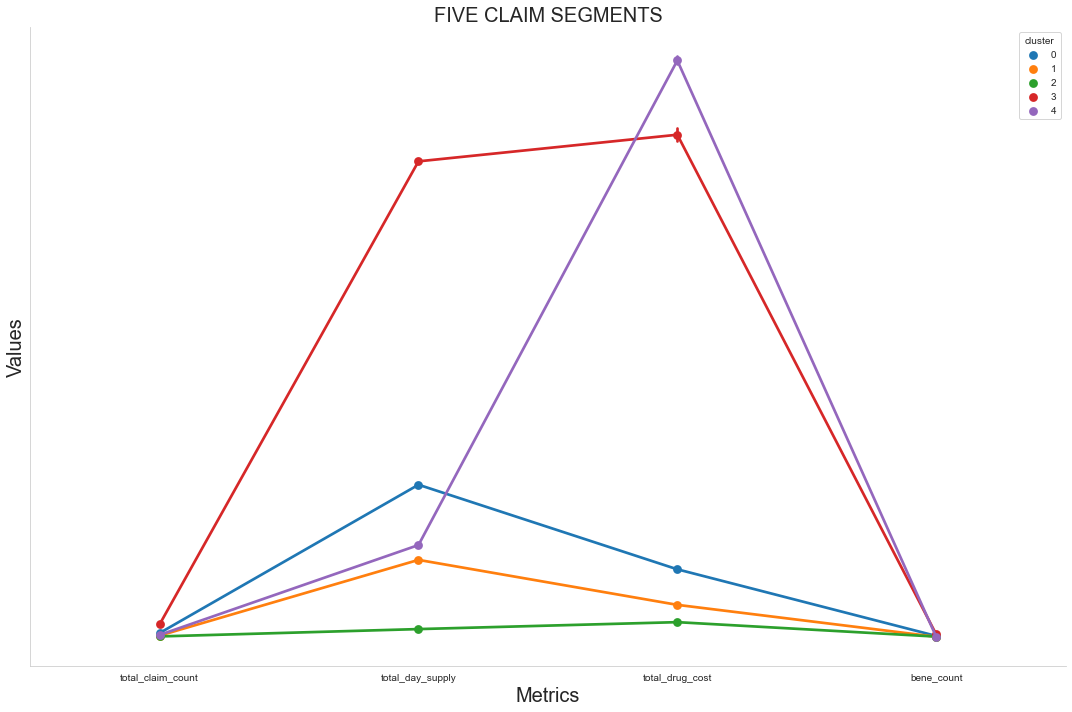

In [33]:
# Reshape data for plotting
cluster_plot = pd.melt(df_clustered2.reset_index(),
                       id_vars=['cluster'],
                       value_vars=['total_claim_count', 'total_day_supply', 'total_drug_cost', 'bene_count'],
                       var_name='Metrics',
                       value_name='Values')

# Create Cluster Plot
plt.figure(figsize=(15,10))
sns.pointplot(x='Metrics', y='Values', data=cluster_plot, hue='cluster')
plt.xlabel("Metrics", size=20)
plt.ylabel('Values', size=20)
plt.yticks([])
plt.title('FIVE CLAIM SEGMENTS', size=20)
sns.despine()
plt.tight_layout()
plt.show()

#### The above plot depicts our 5 claim segments. 

## **Conclusion**

<font size =4>_After Cleansing data in SAS, and building the model here, we have identified the five main clusters (segments) in Medicare Part D Claims data. The higlighted clusters describe their respective vulnerability for potential risk of a fraud based on 4 primary parameters (features). Based on these results, further research can be conducted in response to find the reasoning behind such behaviour and move on to the next stages of analysis, namely - diagnostic and predictive phases._</font>

## **References**

- https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#:~:text=Elbow%20method,-Recall%20that%2C%20the&text=The%20optimal%20number%20of%20clusters%20can%20be%20defined%20as%20follow,sum%20of%20square%20(wss).
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- https://www.geeksforgeeks.org/ml-determine-the-optimal-value-of-k-in-k-means-clustering/
- https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
- https://towardsdatascience.com/credit-risk-unsupervised-clients-clustering-9eacae6807a0
- https://seaborn.pydata.org/introduction.html
- *Introduction to Machine Learning with Python* by Andreas C. Müller & Sarah Guido